*Frederik Chettouh, NIA: 100419069*

*Ainara Apezteguia García, NIA: 100418610*  


In [1]:
from sklearn import svm, preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
import pandas as pd
import time
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data set description

- [Landsat data set](https://archive.ics.uci.edu/ml/datasets/Statlog+(Landsat+Satellite)) is another classic data set in the ML community.

- Patches of land of $3\times 3$ pixels. The data combines four different spectral bands. Two of these are in the visible region (corresponding approximately to green and red regions of the visible spectrum) and two are in the (near) infra-red. Each pixel is a 8-bit binary word, with 0 corresponding to black and 255 to white. The spatial resolution of a pixel is about $80m\times 80m$. Therefore, observations carry 36 components, one per each pixel in the patch and spectral band. The ordering of these components is the follwing

 - $x_0$: pixel (1,1), band 1 
 - $x_1$: pixel (1,1), band 2 
 - $x_2$: pixel (1,1), band 3 
 - $x_3$: pixel (1,1), band 4 
 - $x_4$: pixel (1,2), band 1
 - $x_5$: pixel (1,2), band 2
 - $x_6$: pixel (1,2), band 3
 - $x_7$: pixel (1,2), band 4
 - $x_8$: pixel (1,3), band 1
 - $x_{9}$:pixel (1,3), band 2
 - $x_{10}$:pixel (1,3), band 3
 - $x_{11}$:pixel (1,3), band 4
 - $x_{12}$:pixel (2,1), band 1
 - $x_{13}$:pixel (2,1), band 2
 - $x_{14}$:pixel (2,1), band 3
 - $x_{15}$:pixel (2,1), band 4
 - $x_{16}$:pixel (2,2), band 1
 - $x_{17}$:pixel (2,2), band 2
 - $x_{18}$:pixel (2,2), band 3
 - $x_{19}$:pixel (2,2), band 4
 - $x_{20}$:pixel (2,3), band 1
 - $x_{21}$:pixel (2,3), band 2
 - $x_{22}$:pixel (2,3), band 3
 - $x_{23}$:pixel (2,3), band 4
 - $x_{24}$:pixel (3,1), band 1
 - $x_{25}$:pixel (3,1), band 2
 - $x_{26}$:pixel (3,1), band 3
 - $x_{27}$:pixel (3,1), band 4
 - $x_{28}$:pixel (3,2), band 1
 - $x_{29}$:pixel (3,2), band 2
 - $x_{30}$:pixel (3,2), band 3
 - $x_{31}$:pixel (3,2), band 4
 - $x_{32}$:pixel (3,3), band 1
 - $x_{33}$:pixel (3,3), band 2
 - $x_{34}$:pixel (3,3), band 3
 - $x_{35}$:pixel (3,3), band 4
 
- There are 6 output classes:
 - 1: red soil
 - 2: cotton crop
 - 3: grey soil
 - 4: damp grey soil
 - 5: soil with vegetation stubble
 - 7: very damp grey soil
 
- The correct class for every observation is the output class of pixel (2,2) (the pixel in the center of the patch)

## structure of files "sat_trn.csv" and "sat_tst.csv"

- Each observation is a line of the file
- First 36 numbers are the observation. Last number in the row is the target (class of the central pixel).


# Data preparation

Load data with function np.loadtxt. Separate data in 4 arrays:
- Dtrain: Training set observations. 36 columns, number of rows of "sat_trn.csv"
- ytrain: Training set targets. Array with the last numbers of "sat_trn.csv" rows.
- Dtest: Test set observations. 36 columns, number of rows of "sat_tst.csv"
- ytest: Test set targets. Array with the last numbers of "sat_trn.csv" rows.

In [2]:
from google.colab import drive

drive.mount("/content/drive/")

path='drive/My Drive/ML_SVMHW/Notebook and data for SVM homework-20200324/'
!ls 'drive/My Drive/ML_SVMHW/Notebook and data for SVM homework-20200324/'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
empty_homework_lansat.ipynb  sat_trn.csv  sat_tst.csv


In [3]:
"""
YOUR CODE HERE
"""
train_data = np.loadtxt(path+"sat_trn.csv",delimiter=",")
test_data = np.loadtxt( path+"sat_tst.csv",delimiter=",")
print('Shape of training data set: {0:d} instances with {1:d} columns '.format(train_data.shape[0],train_data.shape[1]))
print('Shape of test data set: {0:d} instances with {1:d} colums '.format(test_data.shape[0],test_data.shape[1]))

Dtrain = train_data[:,0:36]
ytrain = train_data[:,36]
print('Shape of Dtrain: {0:d} instances with {1:d} observations '.format(Dtrain.shape[0],Dtrain.shape[1]))
print('Shape of ytrain: {0:d} instances with training set targets '.format(ytrain.size))

Dtest = test_data[:,0:36]
ytest = test_data[:,36]
print('Shape of Dtest: {0:d} instances with {1:d} observations '.format(Dtest.shape[0],Dtest.shape[1]))
print('Shape of ytest: {0:d} instances with test set targets '.format(ytest.size))


Shape of training data set: 4435 instances with 37 columns 
Shape of test data set: 2000 instances with 37 colums 
Shape of Dtrain: 4435 instances with 36 observations 
Shape of ytrain: 4435 instances with training set targets 
Shape of Dtest: 2000 instances with 36 observations 
Shape of ytest: 2000 instances with test set targets 


# Data with spectral information of the target pixel

The first approach to solve the problem is to look at the spectral information of the central pixel (pixel (2,2)), that is the one we want to classify.

Construct two numpy arrays Xtrain and Xtest with the spectral bands of the target pixel (that is, with the columns of Dtrain and Dtest that contain the spectral information of the pixel we actually want to classify)

In [0]:
"""
YOUR CODE HERE
"""
Xtrain = Dtrain[:,16:20]
Xtest = Dtest[:,16:20]

In [5]:
print("Shape of training set data: {0:d} instances in {1:d} dimensions".format(Xtrain.shape[0], Xtrain.shape[1]))
print("Shape of test set data: {0:d} instances in {1:d} dimensions".format(Xtest.shape[0], Xtest.shape[1]))


Shape of training set data: 4435 instances in 4 dimensions
Shape of test set data: 2000 instances in 4 dimensions


## Normalization

Compute the mean (mean_Xtrain) and standard deviation (std_Xtrain) of the columns of Xtrain. 

In [0]:
"""
YOUR CODE HERE
"""
mean_Xtrain = np.mean(Xtrain,axis=0)
std_Xtrain = np.std(Xtrain, axis=0)

In [7]:
print("Mean of Xtrain (4 components) {0}".format(mean_Xtrain))
print("Standard deviation of Xtrain (4 components) {0}".format(std_Xtrain))

Mean of Xtrain (4 components) [69.12671928 83.43382187 99.24193912 82.61758737]
Standard deviation of Xtrain (4 components) [13.5596788  22.81512052 16.72458377 18.84176935]


The SVM way of deal with the input variables is to ultimatelly combine all the components of the observation inside the kernel function. Very dispair values of the mean and standard deviation of the input variables may turn out in that some of the variables dominate the value of the kernel. 

Imagine a Business Intelligence problem in which a vanilla characterization of customers is made using just the age and yearly income of each customer. Consider these three customers:
- Customer1: age 70 years, income 35000 euros
- Customer2: age 68 years, income 36000 euros
- Customer3: age: 35 years, income 35500 euros

The Euclidean distances are:
- d(Customer1, Customer2) = $\sqrt{(70-68)^2 + (35000-36000)^2}$ = $1000.002$
- d(Customer2, Customer3) = $\sqrt{(35-68)^2 + (35500-36000)^2}$ = $501.09$
- d(Customer1, Customer3) = $\sqrt{(35-70)^2 + (35500-35000)^2}$ = $501.22$

The distance says Customer1 is closer to Customer3 (the smaller distance the more similar the customers) than to Customer2, although it seems more reasonably to think that two persons with ages close to 70 years old and similar income share more preferences than a person in the mid thirties and a person close to 70 years old, despite having similar yearly income. This is because numerically the yearly income dominates the value of the kernel.

The most common normalization is to get each column standarized, that is, zero mean and unit variance. The object StandardScaler from module sklearn.preprocessing does this job for us. Remember (in order to be fair) to fit the scaler just with the training set!!

In [0]:
"""
YOUR CODE HERE
- get Xtrain_n and Xtest_n, the scaled versions of Xtrain and Xtest
- print means and standard deviations of Xtrain_n and Xtest_n
"""
scaler = preprocessing.StandardScaler()
scaler.fit(Xtrain)

Xtrain_n = scaler.transform(Xtrain)
Xtest_n = scaler.transform(Xtest)

In [0]:
mean_Xtrain_n = np.mean(Xtrain_n,axis=0)
std_Xtrain_n = np.std(Xtrain_n, axis=0)

mean_Xtest_n = np.mean(Xtest_n,axis=0)
std_Xtest_n = np.std(Xtest_n, axis=0)

In [10]:
print("Mean of Xtrain_n (4 components) {0}".format(mean_Xtrain_n))
print("Standard deviation of Xtrain_n (4 components) {0}".format(std_Xtrain_n))

print("Mean of Xtest_n (4 components) {0}".format(mean_Xtest_n))
print("Standard deviation of Xtest_n (4 components) {0}".format(std_Xtest_n))

Mean of Xtrain_n (4 components) [-2.85275999e-15 -2.70170958e-16 -7.53969103e-17  1.40733598e-18]
Standard deviation of Xtrain_n (4 components) [1. 1. 1. 1.]
Mean of Xtest_n (4 components) [-0.01922754 -0.03705095 -0.01772475 -0.00244602]
Standard deviation of Xtest_n (4 components) [0.99437723 1.01191341 0.99831081 1.03247522]


## SVM classification

As we learnt in the theory session, a critical issue in SVM is the selection of the kernel. In this case we explore the GridSearch functionality to also choose the kernel. We are dealing with the three most common kernels in SVM:
- RBF kernel with parameter $\gamma$
- Polynomial kernel with parameter $d$
- Linear kernel with no parameter

Choose reasonable ranges of variations to do a grid search with at least 4 values for each parameter. The parameters are 
- v_C: C for all kernels
- v_gamma: gamma for RBF kernel
- v_degree: d for polynomial kernel



In [0]:
"""
YOUR CODE HERE
"""
v_C = [0.001,0.01, 0.1, 1, 10]
v_gamma = [0.01, 0.1, 1, 10, 100]
v_degree = [2, 3, 4, 5, 10]

In [12]:
print("Range of C:")
print(v_C)
print("Range of gamma:")
print(v_gamma)
print("Range of d:")
print(v_degree)

Range of C:
[0.001, 0.01, 0.1, 1, 10]
Range of gamma:
[0.01, 0.1, 1, 10, 100]
Range of d:
[2, 3, 4, 5, 10]


Construct a grid list with the corresponding ranges. The list will have one dictionary per kernel. In order to speed up things a little bit do not use a number of folds larger than 5.

In [0]:
"""
YOUR CODE HERE
"""
# grid of parameters
param_grid = [
  {'C': v_C, 'gamma': v_gamma, 'kernel': ['rbf']},
  {'C': v_C, 'degree': v_degree, 'kernel': ['poly']},
  {'C': v_C, 'kernel': ['linear']}
 ]

Train the grid with CV and print best parameters, classification error in the training set and classification error in the test set

In [15]:
"""
YOUR CODE HERE
- create the GridSearchCV object
- fit it 
- get the best classifier
- print the parameters of this best classifier
- print error in the trainig set and error in the test set
"""
from sklearn.svm import SVC
from sklearn import metrics

t1 = time.time()
#instantiation of the grid of hyperparameters that will be searched with cross validation
grid_clsf = GridSearchCV(
        SVC(), # machine learning object, it needs to implement methods fit, predict and score 
        param_grid, # grid of hyperparameters
        cv=5)

# visit all the nodes in the grid and estimate the true generalization error of a SVM trained with the hyperparameters of the node
grid_clsf.fit(Xtrain_n, ytrain)
t2 = time.time()
tf1 = t2-t1
print('Execution time: {0:2f}'.format(tf1))

classifier = grid_clsf.best_estimator_
best_params = grid_clsf.best_params_

print('Best parameters: ',best_params)

# Training error
Xtrain_n_pred = grid_clsf.predict(Xtrain_n)
error_train_set =  metrics.mean_absolute_error(ytrain, Xtrain_n_pred)

# Testing error
Xtest_n_pred = grid_clsf.predict(Xtest_n)
error_test_set = metrics.mean_absolute_error(ytest, Xtest_n_pred)

acc_train_set = classifier.score(Xtrain_n, ytrain)
acc_test_set = classifier.score(Xtest_n, ytest)

conf_tr = metrics.confusion_matrix(ytrain, Xtrain_n_pred)
cm_tr = sns.light_palette("red", as_cmap=True)
x_tr = pd.DataFrame(conf_tr)
x_tr = x_tr.style.background_gradient(cmap=cm_tr)

conf_ts = metrics.confusion_matrix(ytest, Xtest_n_pred)
cm_ts = sns.light_palette("red", as_cmap=True)
x_ts = pd.DataFrame(conf_ts)
x_ts = x_ts.style.background_gradient(cmap=cm_ts)


print("CE train: {0:.2f}".format(error_train_set))
print("CE test: {0:.2f}".format(error_test_set))
print("Training set accuracy {0:.2f} %".format(acc_train_set*100))
print("Test set accuracy {0:.2f} %".format(acc_test_set*100))

Execution time: 100.855132
Best parameters:  {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
CE train: 0.33
CE test: 0.37
Training set accuracy 86.83 %
Test set accuracy 85.50 %


In [16]:
print("Training confusion matrix:")
display(x_tr)

print("Testing confusion matrix:")
display(x_ts)


Training confusion matrix:


,0,1,2,3,4,5
0,1045,2,17,1,7,0
1,1,434,0,6,31,7
2,5,0,930,23,0,3
3,5,1,116,192,2,99
4,34,7,2,2,377,48
5,0,1,35,112,17,873


Testing confusion matrix:


,0,1,2,3,4,5
0,449,0,7,0,5,0
1,0,209,0,2,11,2
2,3,0,383,9,0,2
3,0,0,53,97,1,60
4,14,7,1,2,185,28
5,0,1,21,52,9,387


# Second view, spatial (context) information

The follwing section aims at reinforcing the classification achieved by the spectral signature of the central pixel with some context information. By context we mean the spectral signature of the other pixels in the patch surrounding the central, target pixel. In this sense the intuituion we pursue is that the most aligned are the spectral signatures of central (target) and surrounding (context) pixels, the more confidence in the classification.

We define the context using a first order approach: the context of each central pixel is the average of the spectral components of the other 8 pixels in the patch. 
$$ \mathbf x_i^{\mbox{context}} = [m_i^{1}, m_i^2, m_i^3, m_i^4]$$

where $m_i^k$ is the average of the 8 spectral signatures in the band $k$ of the non-central pixels of the $i$-th patch. 

Create two numpy arrays, Context_train and Context_test, in which each row is the corresponding $\mathbf x_i^{\mbox{context}}$ for the observation in the $i$-th row of Dtrain and Dtest, respectively.

In [17]:
"""
YOUR CODE
"""
ind1 = np.delete(np.arange(0,36,4),4)
ind2 = np.delete(np.arange(1,36,4),4)
ind3 = np.delete(np.arange(2,36,4),4)
ind4 = np.delete(np.arange(3,36,4),4)

train1 = np.mean(Dtrain[:,ind1],axis=1)
train2 = np.mean(Dtrain[:,ind2],axis=1)
train3 = np.mean(Dtrain[:,ind3],axis=1)
train4 = np.mean(Dtrain[:,ind4],axis=1)
Context_train = np.vstack((train1, train2,train3,train4)).T

test1 = np.mean(Dtest[:,ind1],axis=1)
test2 = np.mean(Dtest[:,ind2],axis=1)
test3 = np.mean(Dtest[:,ind3],axis=1)
test4 = np.mean(Dtest[:,ind4],axis=1)
Context_test = np.vstack((test1, test2,test3,test4)).T

print("Shape of context training set data: {0:d} instances in {1:d} dimensions".format(Context_train.shape[0], Context_train.shape[1]))
print("Shape of context test set data: {0:d} instances in {1:d} dimensions".format(Context_test.shape[0], Context_test.shape[1]))


Shape of context training set data: 4435 instances in 4 dimensions
Shape of context test set data: 2000 instances in 4 dimensions


## Normalization

Your code that implements the scaling of the context components. And get Context_train_n and Context_test_n, as the scaled versions of Context_train and Context_test. Remember, do not fit the scaler with test data!!

In [0]:
"""
YOUR CODE
"""
context_scaler = preprocessing.StandardScaler()

context_scaler.fit(Context_train)
Context_train_n = context_scaler.transform(Context_train) 
Context_test_n = context_scaler.transform(Context_test) 

## SVM classification with the second view (context). 

Repeat the grid search for the best kernel and hyperparameters, but now using Context_train_n and Context_test_n as training and test data, respectively. 

In [19]:
""" 
YOUR CODE
"""
t1 = time.time()
#instantiation of the grid of hyperparameters that will be searched with cross validation
context_grid_clsf = GridSearchCV(
        SVC(), # machine learning object, it needs to implement methods fit, predict and score 
        param_grid, # grid of hyperparameters
        cv = 5) 

# visit all the nodes in the grid and estimate the true generalization error of a SVM trained with the hyperparameters of the node
context_grid_clsf.fit(Context_train_n, ytrain)
t2 = time.time()
tf2 = t2-t1
print('Execution time: {0:2f}'.format(tf2))

context_classifier = context_grid_clsf.best_estimator_
context_best_params = context_grid_clsf.best_params_

print('Best parameters: ',context_best_params)

# Training error
Context_train_n_pred = context_grid_clsf.predict(Context_train_n)
context_error_train_set =  metrics.mean_absolute_error(ytrain, Context_train_n_pred)

# Testing error
Context_test_n_pred = context_grid_clsf.predict(Context_test_n)
context_error_test_set = metrics.mean_absolute_error(ytest, Context_test_n_pred)

context_acc_train_set = context_classifier.score(Context_train_n, ytrain)
context_acc_test_set = context_classifier.score(Context_test_n, ytest)

conf_tr2 = metrics.confusion_matrix(ytrain, Context_train_n_pred)
cm_tr2 = sns.light_palette("red", as_cmap=True)
x_tr2 = pd.DataFrame(conf_tr2)
x_tr2 = x_tr2.style.background_gradient(cmap=cm_tr2)

conf_ts2 = metrics.confusion_matrix(ytest, Context_test_n_pred)
cm_ts2 = sns.light_palette("red", as_cmap=True)
x_ts2 = pd.DataFrame(conf_ts2)
x_ts2 = x_ts2.style.background_gradient(cmap=cm_ts2)

print("CE train: {0:.2f}".format(context_error_train_set))
print("CE test: {0:.2f}".format(context_error_test_set))
print("Training set accuracy {0:.2f} %".format(context_acc_train_set*100))
print("Test set accuracy {0:.2f} %".format(context_acc_test_set*100))


Execution time: 92.170108
Best parameters:  {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
CE train: 0.29
CE test: 0.32
Training set accuracy 87.55 %
Test set accuracy 86.50 %


In [20]:
print("Training confusion matrix:")
display(x_tr2)

print("Testing confusion matrix:")
display(x_ts2)


Training confusion matrix:


,0,1,2,3,4,5
0,1050,1,16,0,5,0
1,0,454,1,1,23,0
2,8,1,922,22,1,7
3,4,3,102,193,20,93
4,14,12,2,10,376,56
5,0,0,28,94,28,888


Testing confusion matrix:


,0,1,2,3,4,5
0,459,0,1,0,1,0
1,0,211,1,1,10,1
2,3,1,374,14,1,4
3,0,0,46,96,8,61
4,8,8,3,5,186,27
5,0,0,16,37,13,404


The model for the second view takes less time and gives us a better performance, the best parameters are the same for both views: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}. The number of true positives is higher in this model and there is specially a good distinction between very damp grey soil - red soil, and very damp grey soil - cotton crop in both models. Moreover, in this second model with the context, the number of false positives and false negatives between red soil and very damp grey soil is 0 and very low for the case of very damp grey soil and cotton crop while these numbers are not that low in the first model.





# Design of an *ad hoc* kernel

In this section we are going to design a kernel that combines the two sources of information: spectral signature and context in the same SVM.

We are exploiting a feature that says that a linear combination of kernels is a kernel. Therefore we are constructing a framework to combine RBF kernels with different values of $\gamma$, one for the spectral features and another for the context. Therefore
$$\kappa(\mathbf x_i, \mathbf x_j) = \mu\kappa^s(\mathbf x^{s}_i, \mathbf x^{s}_j) + (1-\mu)\kappa^c(\mathbf x^{c}_i, \mathbf x^{c}_j)$$
where:
- $\kappa^s$ is the kernel that acts in the spectral information
- $\kappa^c$ is the kernel that acts in the contextual information
- $\mathbf x^{s}_i$ is the spectral signature of patch $\mathbf x_i$
- $\mathbf x^{c}_i$ is the contextual information of patch $\mathbf x_i$ (averages of pixels surrounding the central pixel of the patch)
- $\mu \in [0,1]$ is the combination coefficient. The extreme values $\mu=0$ and $\mu=1$ mean only one of the two views is actually used for in the classification.

## First step: implementation of the RBF kernel

Implement a function called rbf_kernel that gets as parameters the kernel spread parameter $\gamma$ and two numpy arrays (X and Z) of the same dimension and outputs the kernel matrix where the rows are indexed by the first array and the columns by the second one. If K is the numpy array output by this function, its element $(i,j)$ follows:

$$K_{i,j} = \exp\{-\gamma\|\mathbf x_i - \mathbf z_j\|^2\}$$

where:
- $\mathbf x_i$ is the $i$-th row of X,
- $\mathbf z_j$ is the $j$-th row of Z



In [0]:
def rbf_kernel(x,z,gamma): 
    """
    YOUR CODE
    """
    K = np.zeros((len(x),len(z)))
    for i in range(len(x)):
      for j in range(len(z)):
        K[i,j] = np.exp(-gamma*np.linalg.norm(x[i]-z[j])**2)
    return K

## Second step: construct an ad hoc kernel matrix

In this step we construct the new kernel matrix K as a linear combination of the two kernel matrix corresponding to each view. 

Using the above coded rbf_kernel compute:
- $K_s$: training set kernel matrix of the spectral features, the data are Xtrain_n and $\gamma$ the one you obtained in best_parameters
- $K_c$: training set kernel matrix of the context features, the data are Context_train_n and $\gamma$ the one you obtained in best_parameters_context
- $K = \mu K_s + (1-\mu)K_c$. Choose a value for $\mu$ in $[0,1]$

In [0]:
"""
YOUR CODE
"""
K_s = rbf_kernel(Xtrain_n,Xtrain_n,best_params['gamma'])
K_c = rbf_kernel(Context_train_n,Context_train_n,context_best_params['gamma'])
mu = 0.5
K = mu*K_s+(1-mu)*K_c

In [23]:
print('Final kernel shape ',K.shape)

Final kernel shape  (4435, 4435)


Now create a SVC with 'kernel'='precomputed', 'C' set to any reasonable value. And fit it with K and the labels of the training set. Precomputed kernel means that instead of calling the fit, predict and score method of the inner svm with data matrices (as we've done before), we will call them with the corresponding kernel matrices. Read about it in the sklearn documentation. This gives a great flexibility to compute *ad hoc* kernel matrices.

In [24]:
"""
YOUR CODE
- instantiate the classifier
- call fit
"""
param_grid = [{'C': v_C,}]

t1 = time.time()
#instantiation of the grid of hyperparameters that will be searched with cross validation
SVC_grid_clsf = GridSearchCV(
        SVC(kernel='precomputed'), # machine learning object, it needs to implement methods fit, predict and score 
        param_grid, # grid of hyperparameters
        cv = 5) 

# visit all the nodes in the grid and estimate the true generalization error of a SVM trained with the hyperparameters of the node
SVC_grid_clsf.fit(K, ytrain)
t2 = time.time()
tf3 = t2-t1
print('Execution time: {0:2f}'.format(tf3))

SVC_classifier = SVC_grid_clsf.best_estimator_

SVC_best_params = SVC_grid_clsf.best_params_
print('Best parameters:',SVC_best_params)

Execution time: 6.456965
Best parameters: {'C': 10}


Evaluate the error in the training set and in the test set. Notice you need to construct an appropriate kernel matrix with the **test set**.

In [25]:
#Training error
SVC_kernel_train_n_pred = SVC_grid_clsf.predict(K)
SVC_kernel_error_train_set = metrics.mean_absolute_error(ytrain,SVC_kernel_train_n_pred)

K_s_test = rbf_kernel(Xtest_n,Xtrain_n,best_params['gamma']) 
K_c_test = rbf_kernel(Context_test_n,Context_train_n,context_best_params['gamma'])
mu = 0.5
K_test = mu*K_s_test+(1-mu)*K_c_test

#Testing error
SVC_kernel_test_n_pred = SVC_grid_clsf.predict(K_test)
SVC_kernel_error_test_set = metrics.mean_absolute_error(ytest,SVC_kernel_test_n_pred)

SVC_acc_train_set = SVC_classifier.score(K, ytrain)
SVC_acc_test_set = SVC_classifier.score(K_test, ytest)

print("\t CE train: {0:.2f}".format(SVC_kernel_error_train_set))
print("\t CE test: {0:.2f}".format(SVC_kernel_error_test_set))
print("\t Training set accuracy {0:.2f} %".format(SVC_acc_train_set*100))
print("\t Test set accuracy {0:.2f} %".format(SVC_acc_test_set*100))

conf_tr3 = metrics.confusion_matrix(ytrain, SVC_kernel_train_n_pred)
cm_tr3 = sns.light_palette("red", as_cmap=True)
x_tr3 = pd.DataFrame(conf_tr3)
x_tr3 = x_tr3.style.background_gradient(cmap=cm_tr3)

conf_ts3 = metrics.confusion_matrix(ytest, SVC_kernel_test_n_pred)
cm_ts3 = sns.light_palette("red", as_cmap=True)
x_ts3 = pd.DataFrame(conf_ts3)
x_ts3 = x_ts3.style.background_gradient(cmap=cm_ts3)

fscore_tr3 = metrics.precision_recall_fscore_support(ytrain, SVC_kernel_train_n_pred)
fscore_ts3 = metrics.precision_recall_fscore_support(ytest, SVC_kernel_test_n_pred)

	 CE train: 0.19
	 CE test: 0.28
	 Training set accuracy 91.77 %
	 Test set accuracy 88.10 %


In [26]:
print("Training confusion matrix:")
display(x_tr3)
print("Recall for training set: ", fscore_tr3[0])
print("Fscore for training set: ", fscore_tr3[1])
print("Support for training set: ", fscore_tr3[2])
print("Testing confusion matrix:")
display(x_ts3)
print("Recall for testing set: ", fscore_ts3[0])
print("Fscore for testing set: ", fscore_ts3[1])
print("Support for testing set: ", fscore_ts3[2])

Training confusion matrix:


,0,1,2,3,4,5
0,1061,0,8,0,3,0
1,0,469,0,1,8,1
2,5,0,931,21,0,4
3,0,2,90,258,2,63
4,6,3,1,2,422,36
5,0,0,21,74,14,929


Recall for training set:  [0.98973881 0.98945148 0.88582303 0.7247191  0.93986637 0.89932236]
Fscore for training set:  [0.98973881 0.97912317 0.96878252 0.62168675 0.89787234 0.89499037]
Support for training set:  [0.98973881 0.98426023 0.92544732 0.6692607  0.91838955 0.89715113]
Testing confusion matrix:


,0,1,2,3,4,5
0,457,0,0,0,4,0
1,0,217,0,1,5,1
2,3,0,377,15,0,2
3,0,1,50,111,1,48
4,3,6,1,1,202,24
5,0,1,13,47,11,398


Recall for testing set:  [0.98704104 0.96444444 0.85487528 0.63428571 0.9058296  0.84143763]
Fscore for testing set:  [0.99132321 0.96875    0.94962217 0.52606635 0.85232068 0.84680851]
Support for testing set:  [0.98917749 0.96659243 0.89976134 0.57512953 0.87826087 0.84411453]


Giving equal weight to both views, this model shows more true positives and true negatives in both sets than in any of the two views. Moreover, it improves the error and the accuracy. This model has higher recall, Fscore and Support for red soil, cotton crop and grey soil than for the rest of the labels, it can be becuase from the types of soil on the dataset they seem the most different ones.

Explore a few values of $\mu$ in the range $[0,1]$ to see if it is possible to achieve better accuracy mixing the two views. Plot the error in the train and the error in the test set as a function of $\mu$ to support your discussion.

In [27]:
"""
YOUR CODE
"""
train_error = []
test_error = []
m = np.arange(0,1.2,0.2)
for mu in m:
  K = mu*K_s+(1-mu)*K_c
  SVC_grid_clsf.fit(K, ytrain)

  #Training error
  SVC_kernel_train_n_pred = SVC_grid_clsf.predict(K)
  train_error.append(metrics.mean_absolute_error(ytrain,SVC_kernel_train_n_pred))
  
  K_test = mu*K_s_test+(1-mu)*K_c_test

  #Test error
  SVC_kernel_test_n_pred = SVC_grid_clsf.predict(K_test)
  test_error.append(metrics.mean_absolute_error(ytest,SVC_kernel_test_n_pred))

print("The smallest training error is obtained for mu = ", m[train_error.index(min(train_error))])
print("The smallest testing error is obtained for mu = ", m[test_error.index(min(test_error))])

The smallest training error is obtained for mu =  0.4
The smallest testing error is obtained for mu =  0.2


In [28]:
print('Train error:',train_error)
print('Test error:',test_error)

Train error: [0.28883878241262684, 0.19751972942502818, 0.19120631341600902, 0.19165727170236754, 0.20315670800450958, 0.3289740698985344]
Test error: [0.321, 0.269, 0.2805, 0.2725, 0.2755, 0.369]


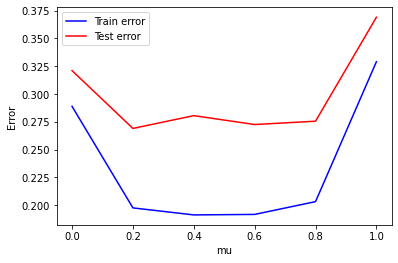

In [29]:
plt.plot(m,train_error,'-b',label='Train error')
plt.plot(m,test_error,'-r',label='Test error')
plt.xlabel('mu')
plt.ylabel('Error')
plt.legend()

**Your discussion**

From the plot above we can conclude that it is possible to obtain better accuracy mixing the two views, since we observe that maximum errors for both sets happen for 0 and 1 values of  $\mu$.

Overall, we obtain best training accuracy for  $\mu$ = 0.4. It was expected for the best model to have a  $\mu$ smaller than 0.5 as the model with the second view gave us better results than the model with the first view. But at the same time, we expected it to be close to 0.5 as the in the previous model ($\mu$ = 0.5) we have seen that the mixture of both views enhances its performance.


## Joint optimization of all the parameters

To exploit the weaponry of sklearn in what respects to learning parameters for a classifier, we are designing our SVM with two kernels in a more professional way, as an instantiation of the class Estimator of sklearn.

The idea of this section is to create our own classifier object, with methods fit, predict and score, so that we can use it within sklearn, in the same way as we use svm.SVC. 

Basically our DualKernelSVM object will encapsulate a sklearn.svm.SVC with the option 'kernel'='precomputed'. This way, the DualKernelSVM methods can be called with actual data matrices (within these methods our code will have to construct the appropriate kernel matrices that the encapsulated inner svm needs to function in mode kernel='precomputed'). 

To keep it as simple as possible, our data matrices will be the horizontal stacking of the corresponding matrices of the two views, for instance 

Joint_train = np.hstack((Xtrain_n, Context_train_n))

The fit, predict and score methods, are going to receive the corresponding Joint_train or Joint_test numpy arrays. Within these methods, your code has to split these Joint_t* arrays in the corresponding Xtrain_n and Context_train_n (or their test counterparts) in order to compute the two kernel matrices that are needed.

The objects of the class DualKernelSVM include the following **attributes** to implement the SVM with the dual kernel:
- numspatial: number of components of the first view of the data. This is because methods fit(), predict() and score() of the DualKernelSVM will be called with a single data array that will include both views. Every row of the input data has the following structure:
 - first numspatial columns have the data corresponding to the first view 
 - columns from numspatial to the end have the data corresponding to the second view.
 
Therefore before calling the methods of the inner SVM, one needs to retrieve each data view from the columns of the input.

- gammas: $\gamma$ for the kernel on the spectral features of the central pixel
- gammac: $\gamma$ for the kernel on the context features. In principle each kernel could have a different value for $\gamma$
- C: $C$ for the SVM with the ad-hoc kernel
- mu: $\mu$, parameter that combines the two kernels
- svm: inner SVM, the one that uses as kernel the one we are constructing (kernel='precomputed')

And the following **methods**:
- fit: your implementation. Construct kernel matrix and call inner svm fit
- predict: your implementation. Construct kernel matrix and call inner svm predict
- score: your implementation. Construct kernel matrix and call inner svm score
- get_params: already coded
- set_params: already coded


In [0]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels

class TemplateClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, 
                 numspatial = 4,
                 C = 1,
                 gammas = 1,
                 gammac = 1,
                 mu = 0.5):
        self.numspatial = numspatial
        self.C = C
        self.gammas= gammas
        self.gammac = gammac
        self.svm = svm.SVC(C=C, 
                           kernel='precomputed') #inner SVM
        self.mu = mu
    
    def fit(self, X, y):
        # Check that X and y have correct shape
        X, y = check_X_y(X, y)
        # Store the classes seen during fit
        self.classes_ = unique_labels(y)

        """
        YOUR CODE
        - Splits X in spectral data and context
        - Construct Kernel matrix K
        - fits the internal SVM with K
        """
        self.X = X.copy()
        X_spectral_tr = X[:,0:self.numspatial]
        X_context_tr = X[:,self.numspatial:]
        K_s = rbf_kernel(X_spectral_tr,X_spectral_tr,self.gammas)
        K_c = rbf_kernel(X_context_tr,X_context_tr,self.gammac)
        K = self.mu*K_s+(1-self.mu)*K_c
        self.svm.fit(K, y)

        return self

    def predict(self, X):
        # Check is fit had been called
        check_is_fitted(self)
        """
        YOUR CODE
        - Splits X in spectral data and context
        - Constructs Kernel matrix Ktest
        - Predicts Ktest with the (already fit) internal SVM
        """
        X_spectral_tr = self.X[:,0:self.numspatial]
        X_context_tr = self.X[:,self.numspatial:]
        X_spectral_ts = X[:,0:self.numspatial]
        X_context_ts = X[:,self.numspatial:]
        K_s = rbf_kernel(X_spectral_ts,X_spectral_tr,self.gammas)
        K_c = rbf_kernel(X_context_ts,X_context_tr,self.gammac)
        Ktest = self.mu*K_s+(1-self.mu)*K_c

        return self.svm.predict(Ktest)
    
    def get_params(self, deep=True):
        # suppose this estimator has parameters "alpha" and "recursive"
        return {"C": self.C, 
                "numspatial": self.numspatial,
               "gammas" : self.gammas,
               "gammac" : self.gammac,
               "mu" : self.mu}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

    def score(self, X, y):
        X, y = check_X_y(X, y)
        """
        YOUR CODE
        - Splits X in spectral data and context
        - Constructs Kernel matrix Ktest
        """
        X_spectral_tr = self.X[:,0:self.numspatial]
        X_context_tr = self.X[:,self.numspatial:]
        X_spectral_ts = X[:,0:self.numspatial]
        X_context_ts = X[:,self.numspatial:]
        K_s = rbf_kernel(X_spectral_ts,X_spectral_tr,self.gammas)
        K_c = rbf_kernel(X_context_ts,X_context_tr,self.gammac)
        Ktest = self.mu*K_s+(1-self.mu)*K_c
        
        return self.svm.score(Ktest, y)

Create grid with parameters

We fixed the values of gamma and C obtaining best results and change the value of mu in order to obtain the best combination of kernels.

In [31]:
""" 
YOUR CODE
"""
from sklearn.model_selection import ParameterGrid
v_mu = [0.4,0.5,0.6]

params_grid = [{'numspatial': [4], 'C': [10], 'gammas': [1], 'gammac': [1], 'mu': v_mu},]
param_grid = list(ParameterGrid(params_grid))
display(param_grid)

[{'C': 10, 'gammac': 1, 'gammas': 1, 'mu': 0.4, 'numspatial': 4},
 {'C': 10, 'gammac': 1, 'gammas': 1, 'mu': 0.5, 'numspatial': 4},
 {'C': 10, 'gammac': 1, 'gammas': 1, 'mu': 0.6, 'numspatial': 4}]

Fit grid with training data

In [32]:
""" 
YOUR CODE
"""
t1 = time.time()
#instantiation of the grid of hyperparameters that will be searched with cross validation
grid_clsf_temp = TemplateClassifier()

Joint_train = np.hstack((Xtrain_n, Context_train_n))
Joint_test = np.hstack((Xtest_n, Context_test_n))

score_max_train = 0.
grid_clsf_temp_opt = grid_clsf_temp
score_test = 0.
pred_test = []
pred_train = []
for i in range(len(param_grid)):
  param = param_grid[i]
  # visit all the nodes in the grid and estimate the true generalization error of a SVM trained with the hyperparameters of the node
  grid_clsf_temp.set_params(**param).fit(Joint_train, ytrain)
  grid_clsf_temp_pred_train = grid_clsf_temp.predict(Joint_train)
  score = grid_clsf_temp.score(Joint_train,ytrain)
  
  if (score>score_max_train):
    score_max_train = score
    grid_clsf_temp_opt = grid_clsf_temp
    score_test = grid_clsf_temp.score(Joint_test,ytest)
    pred_train.append(grid_clsf_temp_pred_train) 
    grid_clsf_temp.set_params(**param).fit(Joint_test, ytest)
    grid_clsf_temp_pred_test = grid_clsf_temp.predict(Joint_test)
    pred_test.append(grid_clsf_temp_pred_test)

t2 = time.time()
tf4 = t2-t1
print('Execution time: {0:2f}'.format(tf4))

conf_tr4 = metrics.confusion_matrix(ytrain, pred_train[-1])
cm_tr4 = sns.light_palette("red", as_cmap=True)
x_tr4 = pd.DataFrame(conf_tr3)
x_tr4 = x_tr4.style.background_gradient(cmap=cm_tr3)

conf_ts4 = metrics.confusion_matrix(ytest, pred_test[-1])
cm_ts4 = sns.light_palette("red", as_cmap=True)
x_ts4 = pd.DataFrame(conf_ts4)
x_ts4 = x_ts4.style.background_gradient(cmap=cm_ts4)



Execution time: 3357.904783


In [0]:
fscore_tr4 = metrics.precision_recall_fscore_support(ytrain, pred_train[-1])
fscore_ts4 = metrics.precision_recall_fscore_support(ytest, pred_test[-1])

Evaluate best classifier, training and test

In [34]:
print("Training confusion matrix:")
display(x_tr4)
print("Recall for training set: ", fscore_tr4[0])
print("Fscore for training set: ", fscore_tr4[1])
print("Support for training set: ", fscore_tr4[2])
print("Testing confusion matrix:")
display(x_ts4)
print("Recall for testing set: ", fscore_ts4[0])
print("Fscore for testing set: ", fscore_ts4[1])
print("Support for testing set: ", fscore_ts4[2])

Training confusion matrix:


,0,1,2,3,4,5
0,1061,0,8,0,3,0
1,0,469,0,1,8,1
2,5,0,931,21,0,4
3,0,2,90,258,2,63
4,6,3,1,2,422,36
5,0,0,21,74,14,929


Recall for training set:  [0.97506925 0.97659574 0.86997194 0.64488636 0.91136364 0.87757101]
Fscore for training set:  [0.98507463 0.95824635 0.96774194 0.54698795 0.85319149 0.86319846]
Support for training set:  [0.9800464  0.96733404 0.91625616 0.59191656 0.88131868 0.8703254 ]
Testing confusion matrix:


,0,1,2,3,4,5
0,459,0,1,0,1,0
1,0,218,0,1,5,0
2,2,1,375,16,0,3
3,0,0,36,131,3,41
4,8,1,0,0,210,18
5,0,1,12,55,12,390


Recall for testing set:  [0.97867804 0.98642534 0.88443396 0.6453202  0.90909091 0.86283186]
Fscore for testing set:  [0.99566161 0.97321429 0.94458438 0.62085308 0.88607595 0.82978723]
Support for testing set:  [0.98709677 0.97977528 0.9135201  0.63285024 0.8974359  0.84598698]


In [35]:
""" 
YOUR CODE
"""
print('Classifier', grid_clsf_temp_opt )
print('CE train {0:-2f} '.format(metrics.mean_absolute_error(ytrain,pred_train[-1])))
print('CE test {0:-2f} '.format(metrics.mean_absolute_error(ytest,pred_test[-1])))
print('Training accuracy {0:.2f} %'.format(score_max_train*100))
print('Testing accuracy {0:.2f} %'.format(score_test*100))

Classifier TemplateClassifier(C=10, gammac=1, gammas=1, mu=0.6, numspatial=4)
CE train 0.251184 
CE test 0.265500 
Training accuracy 89.49 %
Testing accuracy 87.70 %


# Discussion

- We have tried to solve an satellite image classification problem using three approaches:
 - information of frequency spectrum of the pixel we want to classify
 - information about the spectrum of the pixels in the patch surrounding the pixel of interest
 - combination of these two sources of information.

- **Comment** on which turned out to be the better option in your opinion. Items you can use:
 - Differences between errors in training and test set
 - Confusion matrices to see differences in the classification of the different classes

- **Comment** about if it was worthy to use the dual kernel approach:
 - Trade-off between accuracy and complexity


### Extra 

**(you don't need to do it, just in case you feel like working and writting a little more)**

 - Would it be better to use an SVM with the 36 frequential components of all the pixels in the patch in the same kernel instead of the three approaches that have been used?
 - Discuss on the impact of the scaling of the features, and investigate if other scaling would have led to better results.

The results obtained for the three approaches are the following:

**Only the spectrum**:
- Execution time: 100.855132s
- CE train: 0.33
- CE test: 0.37
- Training set accuracy 86.83 %
- Test set accuracy 85.50 %

**Contextual information**:

- Execution time: 92.170108s
- CE train: 0.29
- CE test: 0.32
- Training set accuracy 87.55 %
- Test set accuracy 86.50 %

**Combination of the two sources of information**:

- Execution time: 3357.904783s
- CE train 0.25
- CE test 0.26
- Training accuracy 89.49 %
- Testing accuracy 87.70 %

Both MAE and accuracy metrics on both sets are better for the combined model, but the execution time is very long compared to the time needed for the other two models.

As far as the trade-off between accuracy and complexity is concerned, the best option may be to use the model that takes into account only the contextual information as the results are not too far from the ones obtained with the combined model and the execution time is notoriously shorter. 

In this model the combination of classes which have the highest missclassification are cotton crop - soil with vegetation stubble and grey soil - soil with vegetation stubble.



